In [1]:
import sys
# add didgelab source code to path
sys.path.append('../../')

from cad.calc.parameters import MutationParameterSet, MutationParameter
from cad.ui.visualization import DidgeVisualizer
import numpy as np
from cad.calc.geo import Geo, geotools
import sys

<AxesSubplot: xlabel='x', ylabel='y'>

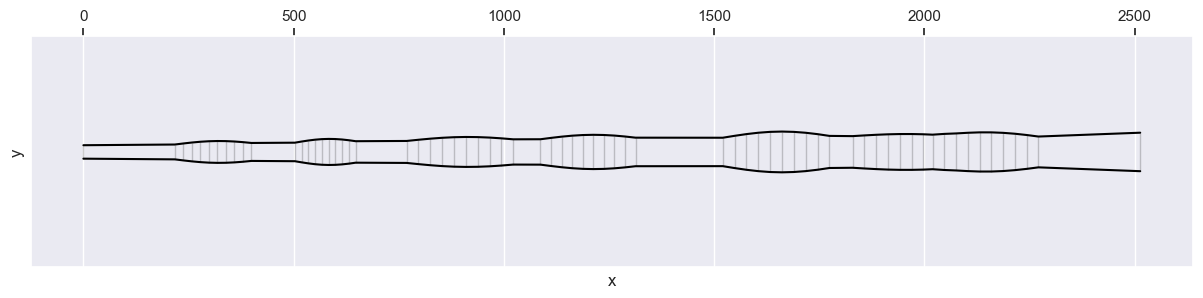

In [84]:
class EriceiraShape(MutationParameterSet):
    
    def __init__(self):
        
        MutationParameterSet.__init__(self)

        self.d1=32
        
        self.add_param("length", )
        
        self.n_bubbles=7
        self.n_bubble_segments=10
        
        self.add_param("length", 2000, 2700)
        self.add_param("bellsize", 65, 100)
        self.add_param("bell_length", 200, 300)
        self.add_param("pre_bell_diameter", 0.7, 0.8)
        
        
        for i in range(self.n_bubbles):
            self.add_param(f"bubble{i}_width", 100, 300)
            self.add_param(f"bubble{i}_height", 5, 30)
            self.add_param(f"bubble{i}_pos", -0.3, 0.3)

    def make_geo(self):
        length = self.get_value("length")
        bellsize = self.get_value("bellsize")
        bell_length = self.get_value("bell_length")
        shape = [
            [0, self.d1],
            [length-bell_length, bellsize * self.get_value("pre_bell_diameter")],
            [length,bellsize]
        ]
        
        bubble_length = length-bell_length
        for i in range(self.n_bubbles):
            
            width = self.get_value(f"bubble{i}_width")
            height = self.get_value(f"bubble{i}_height")
            pos = self.get_value(f"bubble{i}_pos")
                
            x = width * np.arange(self.n_bubble_segments)/self.n_bubble_segments
            y = height * np.sin(np.arange(self.n_bubble_segments)*np.pi/self.n_bubble_segments)
            
            x += bubble_length * i/self.n_bubbles
            x += (0.5+pos)*bubble_length/self.n_bubbles
                        
            if x[0] < 0:
                x += -1*x[0]
                x += 1
            if x[-1] > bubble_length:
                x -= x[-1] - (bubble_length)
            
            geo = Geo(shape)
            y += np.array([geotools.diameter_at_x(geo, _x) for _x in x])
            
            shape = list(filter(lambda a : a[0]<x[0] or a[0]>x[-1], shape))
            shape.extend(zip(x,y))
            shape = sorted(shape, key=lambda x : x[0])
            

        return Geo(shape)
        
shape = EriceiraShape()


geo = shape.make_geo()
DidgeVisualizer.vis_didge(geo)

#cadsd = CADSD(mutant.make_geo())
#impedance_spectrum=cadsd.get_impedance_spektrum()
#sns.lineplot(data=impedance_spectrum, x="freq", y="impedance")

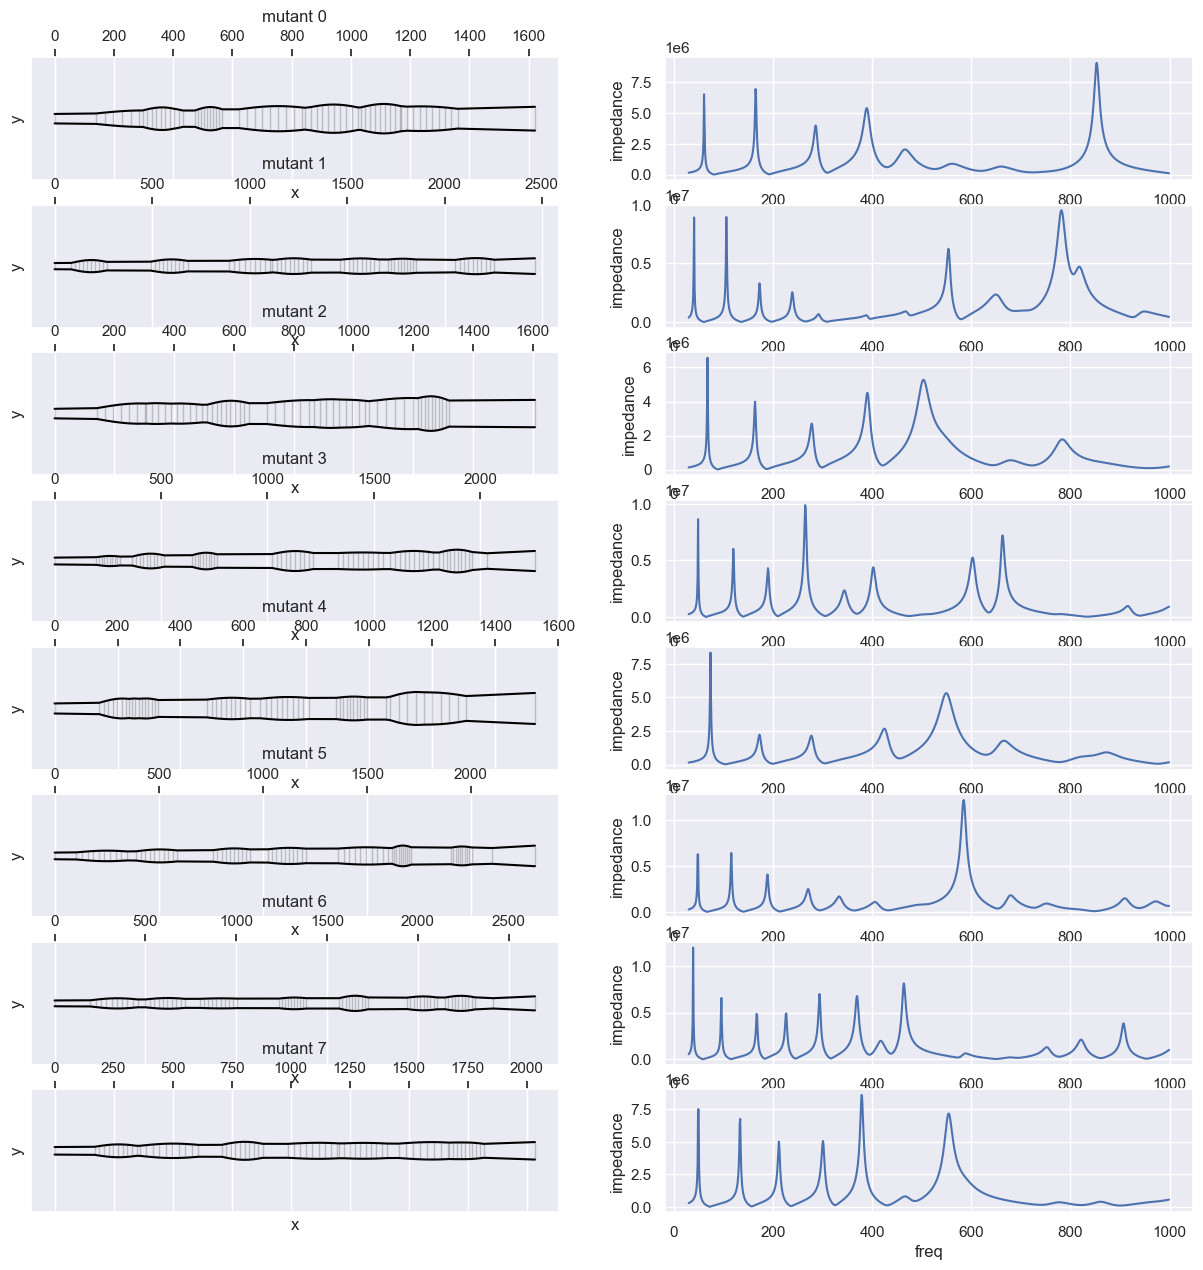

In [85]:
import matplotlib.pyplot as plt
from cad.cadsd.cadsd import CADSD
import seaborn as sns
from cad.calc.mutation import ExploringMutator
mutator = ExploringMutator()

plt.figure(figsize=(15,15))
n_mutants = 8
for i in range(n_mutants):
    plt.subplot(n_mutants, 2, 2*i+1)
    mutant = shape.copy()
    mutator.mutate(mutant)
    geo = mutant.make_geo()
    DidgeVisualizer.vis_didge(geo)
    plt.title("mutant " + str(i))
    
    plt.subplot(n_mutants, 2, 2*i+2)
    cadsd = CADSD(geo)
    impedance_spectrum=cadsd.get_impedance_spektrum()
    sns.lineplot(data=impedance_spectrum, x="freq", y="impedance")



In [ ]:
2